<a href="https://colab.research.google.com/github/HRashidLiaquat/lessons-learned/blob/main/Fruits.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**Project Title: Fruit Classification with Convolutional Neural Network**


**Project Workflow**
1.  Import important libraries
2.  Get data ready in Kaggle.
3.  Preparing My Images
4.  Loading training images
5.  Create Data Loaders
6.  Build A model
7.  Model training
8.  Model Testing (Training Loop)
9.  Model Evaluation
10.  Testing with new data point
11.  Save model

**Import important libraries**

In [36]:
from pathlib import Path
import torch
import torch.nn as nn
from torchvision import datasets, transforms
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt
import numpy as np
import torch.optim as optim
import zipfile
from PIL import Image



**Get ready data in kaggle**

In [17]:
datset_path = Path('/content/data/fruits-360_100x100/fruits-360')

if datset_path.exists():
  print("Dataset found!")
else:
  print("Dataset not found!")


Dataset found!


In [18]:
if datset_path.exists():
  datsetfolderlist = list(datset_path.iterdir())
  print("See all folder in my dataset main folder")
  for allfolder in datsetfolderlist:
      print(allfolder)

See all folder in my dataset main folder
/content/data/fruits-360_100x100/fruits-360/Test
/content/data/fruits-360_100x100/fruits-360/LICENSE
/content/data/fruits-360_100x100/fruits-360/Training
/content/data/fruits-360_100x100/fruits-360/README.md


In [20]:
traning_path = datset_path / '/content/data/fruits-360_100x100/fruits-360/Training'
print(traning_path)
test_path = datset_path / '/content/data/fruits-360_100x100/fruits-360/Test'

print(test_path)

/content/data/fruits-360_100x100/fruits-360/Training
/content/data/fruits-360_100x100/fruits-360/Test


In [29]:
#count all types of data classes

train_classes = [item.name for item in traning_path.iterdir() if item.is_dir()]
train_classes.sort()
num_classes = len(train_classes)
print(f"📁 Total fruit classes: {num_classes}")

📁 Total fruit classes: 240


**Show some classes data **

In [32]:
for i,class_name in enumerate(train_classes[:10]):
    print(f"{i+1}. {class_name}")


1. Apple 10
2. Apple 11
3. Apple 12
4. Apple 13
5. Apple 14
6. Apple 17
7. Apple 18
8. Apple 19
9. Apple 5
10. Apple 6


In [33]:
for i, class_name in enumerate(train_classes[-10:]):
  print(f"{i+1}. {train_classes}")

1. ['Apple 10', 'Apple 11', 'Apple 12', 'Apple 13', 'Apple 14', 'Apple 17', 'Apple 18', 'Apple 19', 'Apple 5', 'Apple 6', 'Apple 7', 'Apple 8', 'Apple 9', 'Apple Braeburn 1', 'Apple Core 1', 'Apple Crimson Snow 1', 'Apple Golden 1', 'Apple Golden 2', 'Apple Golden 3', 'Apple Granny Smith 1', 'Apple Pink Lady 1', 'Apple Red 1', 'Apple Red 2', 'Apple Red 3', 'Apple Red Delicious 1', 'Apple Red Yellow 1', 'Apple Red Yellow 2', 'Apple Rotten 1', 'Apple hit 1', 'Apple worm 1', 'Apricot 1', 'Avocado 1', 'Avocado Black 1', 'Avocado Black 2', 'Avocado Green 1', 'Avocado ripe 1', 'Banana 1', 'Banana 3', 'Banana 4', 'Banana Lady Finger 1', 'Banana Red 1', 'Beans 1', 'Beetroot 1', 'Blackberrie 1', 'Blackberrie 2', 'Blackberrie half rippen 1', 'Blackberrie not rippen 1', 'Blueberry 1', 'Cabbage red 1', 'Cabbage white 1', 'Cactus fruit 1', 'Cactus fruit green 1', 'Cactus fruit red 1', 'Caju seed 1', 'Cantaloupe 1', 'Cantaloupe 2', 'Carambula 1', 'Carrot 1', 'Cauliflower 1', 'Cherimoya 1', 'Cherry 1

**Count Images in one class**

In [34]:
first_class = train_classes[0]
first_class_path = traning_path/ first_class
num_images = len(list(first_class_path.iterdir()))
print(f"First class: {first_class}")
print(f"Number of images: {num_classes}")


First class: Apple 10
Number of images: 240


**count multiple classes**

In [35]:
for i, class_name in enumerate(train_classes[:5]):
  class_folder = traning_path / class_name
  num_images = len(list(class_folder.iterdir()))
  print(f"{i + 1}. {class_name}: {num_images} images")

1. Apple 10: 699 images
2. Apple 11: 430 images
3. Apple 12: 466 images
4. Apple 13: 699 images
5. Apple 14: 466 images


**Loard First Image**

In [39]:
first_class = train_classes[0]
first_image_path = list(first_class_path.iterdir())[0]

img = Image.open(first_image_path)

print(f"Class: {first_class}")
print(f"Image name: {first_class_path.name}")
print(f"Image size:{img.size}")
print(f"Image mode: {img.mode}")

Class: Apple 10
Image name: Apple 10
Image size:(100, 100)
Image mode: RGB


**Display first Image**

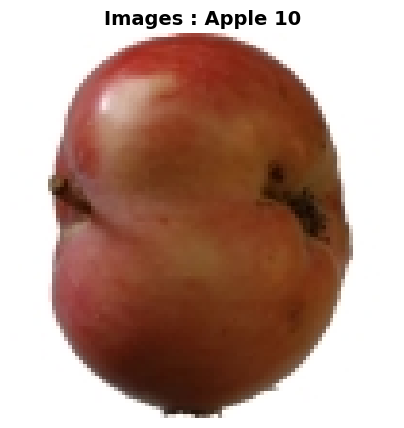

In [40]:
plt.figure(figsize = (5, 5))
plt.imshow(img)
plt.title(f"Images : {first_class}", fontsize = 14, fontweight = 'bold')
plt.axis('off')
plt.show()

**Show some Random images**

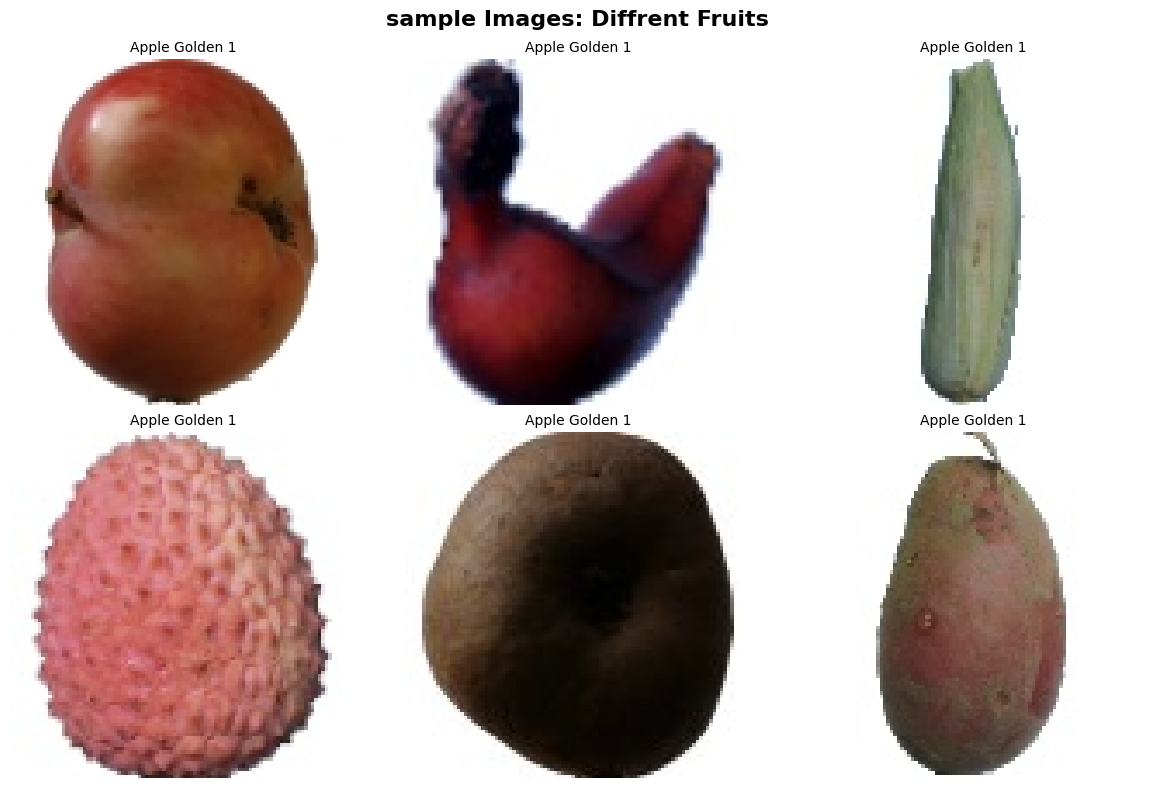

In [46]:
fig, axes = plt.subplots(2, 3, figsize = (12, 8))
axes = axes.ravel()
total_classes = len(train_classes)
step = total_classes//6
for i in range(6):
  class_idx = i * step
  fruit_name = train_classes[class_idx]
  fruit_path = traning_path / fruit_name
  image_path = list(fruit_path.iterdir())[0]
  img = Image.open(image_path)

  axes[i].imshow(img)
  axes[i].set_title(class_name, fontsize = 10)
  axes[i].axis('off')

plt.suptitle('sample Images: Diffrent Fruits', fontsize = 16, fontweight = 'bold')
plt.tight_layout()
plt.show()